<a href="https://colab.research.google.com/github/icaroo-oliveira/regress-o_instagram/blob/main/Regressao_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



>
ÍCARO JOSÉ



In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDRegressor, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '').strip()) * 1000
        elif 'm' in value:
            return float(value.replace('m', '').strip()) * 1_000_000
        elif 'b' in value:
            return float(value.replace('b', '').strip()) * 1_000_000_000
    return value

In [ ]:
df = pd.read_csv('top_insta_influencers_data.csv')


df.head(50)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States
6,7,arianagrande,92,5.0k,327.7m,3.7m,1.20%,3.9m,18.4b,United States
7,8,beyonce,92,2.0k,272.8m,3.6m,0.76%,2.0m,7.4b,United States
8,9,khloekardashian,89,4.1k,268.3m,2.4m,0.35%,926.9k,9.8b,United States
9,10,justinbieber,91,7.4k,254.5m,1.9m,0.59%,1.5m,13.9b,Canada


In [ ]:


frequencias = df['new_post_avg_like'].value_counts()

In [ ]:
df['posts'] = df['posts'].apply(convert_to_numeric)
df['followers'] = df['followers'].apply(convert_to_numeric)
df['avg_likes'] = df['avg_likes'].apply(convert_to_numeric)
df['new_post_avg_like'] = df['new_post_avg_like'].apply(convert_to_numeric)
df['total_likes'] = df['total_likes'].apply(convert_to_numeric)

df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float) / 100

df = df.drop('country', axis=1)
df = df.drop('rank', axis=1)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   channel_info       200 non-null    object 
 1   influence_score    200 non-null    int64  
 2   posts              200 non-null    float64
 3   followers          200 non-null    float64
 4   avg_likes          200 non-null    float64
 5   60_day_eng_rate    199 non-null    float64
 6   new_post_avg_like  200 non-null    object 
 7   total_likes        200 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB
None


In [ ]:
df['60_day_eng_rate'].unique()
df = df.dropna(subset=['60_day_eng_rate'])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   channel_info       199 non-null    object 
 1   influence_score    199 non-null    int64  
 2   posts              199 non-null    float64
 3   followers          199 non-null    float64
 4   avg_likes          199 non-null    float64
 5   60_day_eng_rate    199 non-null    float64
 6   new_post_avg_like  199 non-null    object 
 7   total_likes        199 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 14.0+ KB
None


In [ ]:
print(df.describe())

       influence_score         posts     followers     avg_likes  \
count       199.000000    199.000000  1.990000e+02  1.990000e+02   
mean         81.814070   3516.884422  7.761256e+07  1.741310e+06   
std           8.900153   3476.215047  7.381699e+07  2.100856e+06   
min          22.000000     10.000000  3.280000e+07  6.510000e+04   
25%          80.000000    950.000000  4.005000e+07  5.031000e+05   
50%          84.000000   2100.000000  5.020000e+07  1.100000e+06   
75%          86.000000   5050.000000  6.890000e+07  2.100000e+06   
max          93.000000  17500.000000  4.758000e+08  1.540000e+07   

       60_day_eng_rate   total_likes  
count       199.000000  1.990000e+02  
mean          0.019020  3.670465e+09  
std           0.033297  5.573215e+09  
min           0.000100  1.830000e+07  
25%           0.004100  9.937000e+08  
50%           0.008800  2.000000e+09  
75%           0.020350  4.000000e+09  
max           0.264100  5.740000e+10  


In [ ]:
df.head(50)

,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
0,cristiano,92,3300.0,475800000.0,8700000.0,0.0139,6500000.0,2.900000e+10
1,kyliejenner,91,6900.0,366200000.0,8300000.0,0.0162,5900000.0,5.740000e+10
2,leomessi,90,890.0,357300000.0,6800000.0,0.0124,4400000.0,6.000000e+09
3,selenagomez,93,1800.0,342700000.0,6200000.0,0.0097,3300000.0,1.150000e+10
4,therock,91,6800.0,334100000.0,1900000.0,0.0020,665300.0,1.250000e+10
5,kimkardashian,91,5600.0,329200000.0,3500000.0,0.0088,2900000.0,1.990000e+10
6,arianagrande,92,5000.0,327700000.0,3700000.0,0.0120,3900000.0,1.840000e+10
7,beyonce,92,2000.0,272800000.0,3600000.0,0.0076,2000000.0,7.400000e+09
8,khloekardashian,89,4100.0,268300000.0,2400000.0,0.0035,926900.0,9.800000e+09
9,justinbieber,91,7400.0,254500000.0,1900000.0,0.0059,1500000.0,1.390000e+10


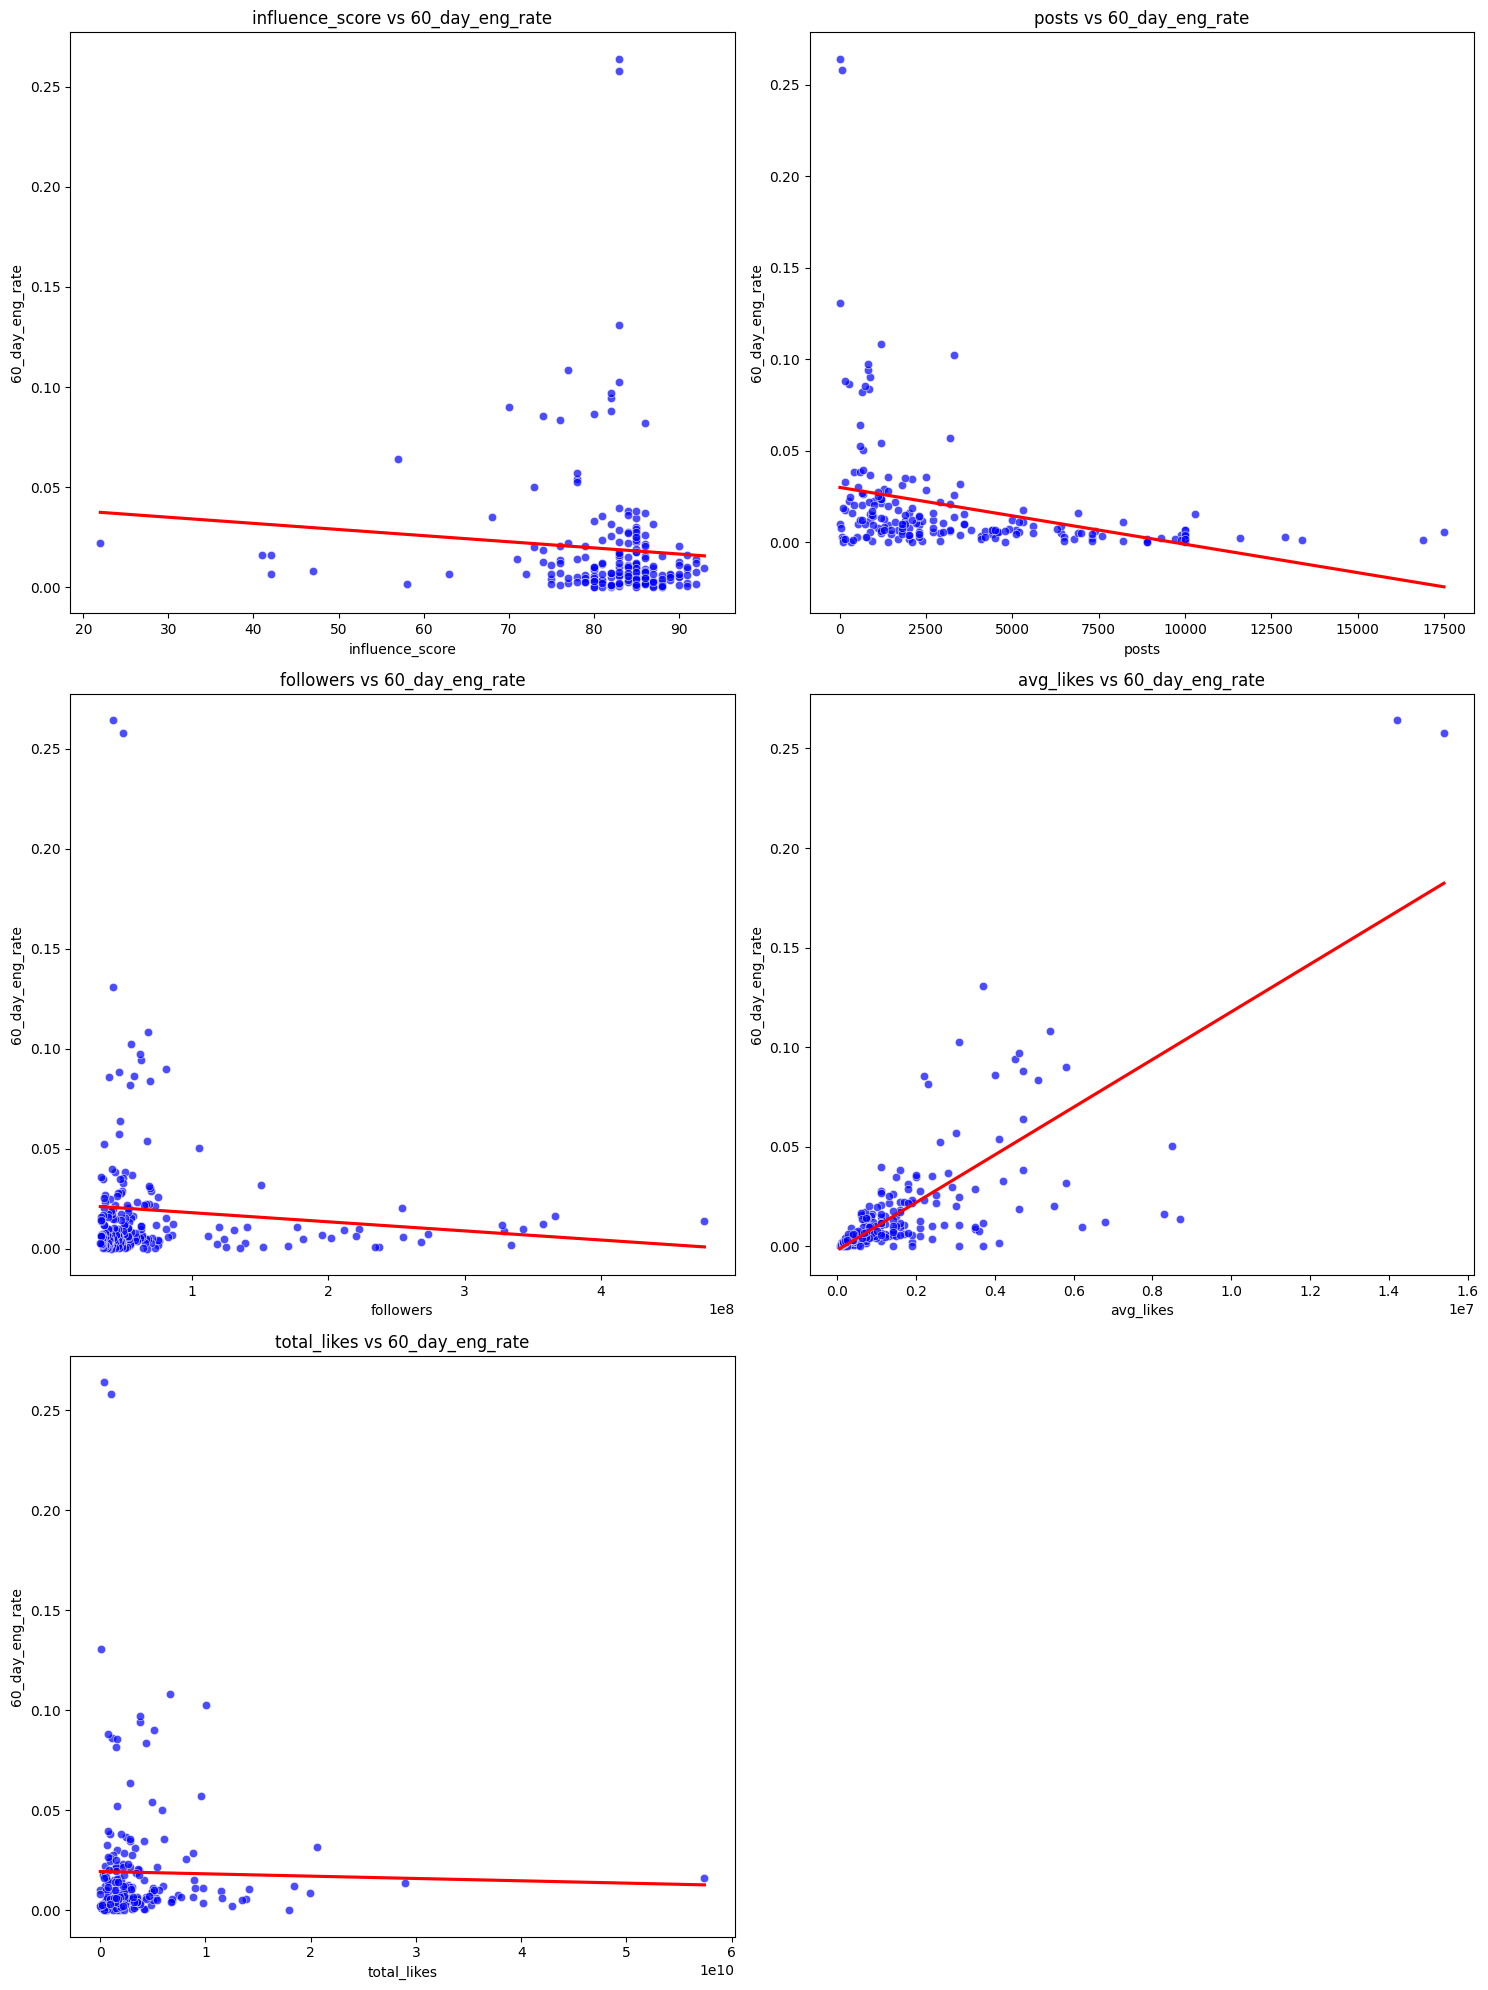

In [ ]:
numerical_columns = ['influence_score', 'posts', 'followers', 'avg_likes', 'total_likes']

# Criar os scatter plots
plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)  # Organiza os gráficos em uma grade de 3x2
    sns.scatterplot(data=df, x=col, y='60_day_eng_rate', alpha=0.7, color='blue')  # Plota os pontos
    sns.regplot(data=df, x=col, y='60_day_eng_rate', scatter=False, color='red', ci=None)  # Linha de regressão (sem pontos)
    plt.title(f'{col} vs 60_day_eng_rate')
    plt.xlabel(col)
    plt.ylabel('60_day_eng_rate')

# Ajuste do layout
plt.tight_layout()
plt.show()

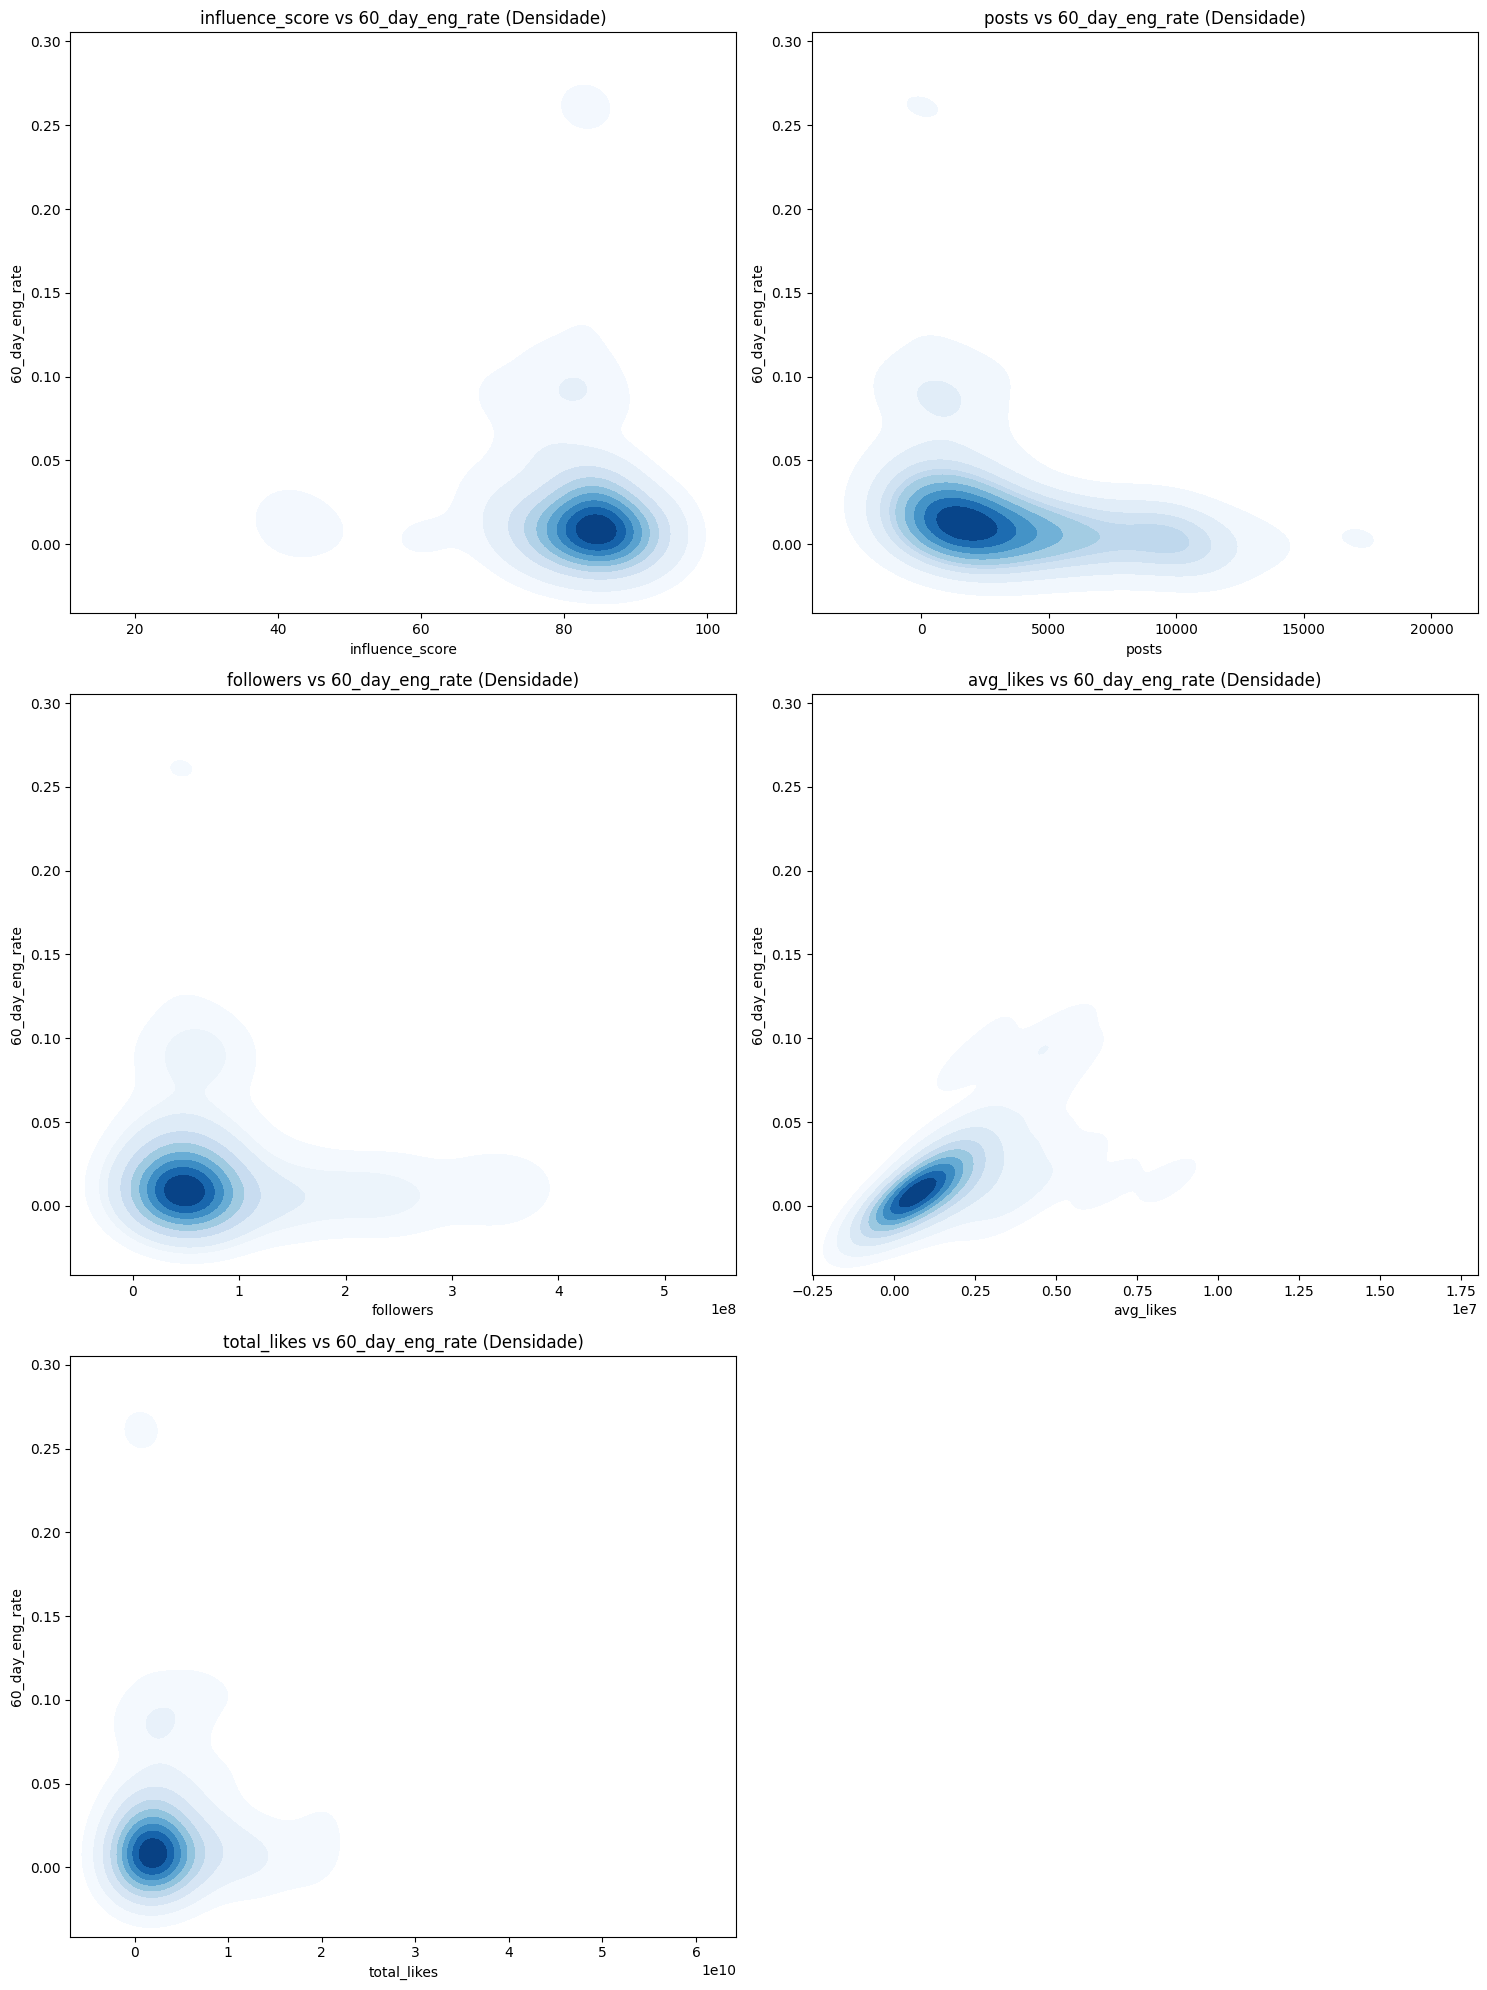

In [ ]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df, x=col, y='60_day_eng_rate', cmap='Blues', fill=True)
    plt.title(f'{col} vs 60_day_eng_rate (Densidade)')
    plt.xlabel(col)
    plt.ylabel('60_day_eng_rate')

plt.tight_layout()
plt.show()


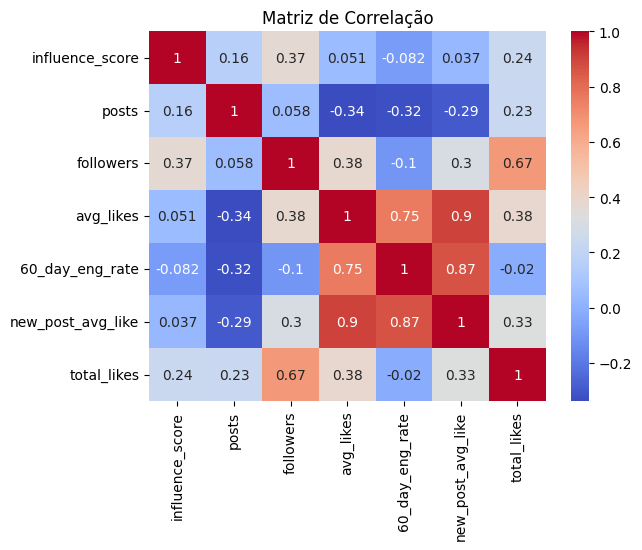

In [ ]:

df_numerical = df.drop(columns=["channel_info"])

df_numerical.head()

correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
df_numerical = df_numerical.drop(columns=["avg_likes"])
df_numerical = df_numerical.drop(columns=["influence_score"])
df_numerical.head()

,posts,followers,60_day_eng_rate,new_post_avg_like,total_likes
0,3300.0,475800000.0,0.0139,6500000.0,2.900000e+10
1,6900.0,366200000.0,0.0162,5900000.0,5.740000e+10
2,890.0,357300000.0,0.0124,4400000.0,6.000000e+09
3,1800.0,342700000.0,0.0097,3300000.0,1.150000e+10
4,6800.0,334100000.0,0.0020,665300.0,1.250000e+10


In [ ]:




#Separando variável independente (X) e dependente (y)
X = df_numerical.drop(columns=["60_day_eng_rate"])
y = df_numerical["60_day_eng_rate"]

# Padronização dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treinamento e teste 20% teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Gradiente Descendente com L2 e L1 com importância iguais;
model = SGDRegressor(penalty='elasticnet', l1_ratio=0.5, alpha=0.001, max_iter=1000, learning_rate='constant', eta0=0.01,random_state=42)

#Validação cruzada com 5 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

#Média dos resultados de validação cruzada
cv_rmse = (-cv_scores.mean()) ** 0.5
print(f"RMSE médio da validação cruzada: {cv_rmse:.4f}")

#Treinando o modelo final no conjunto de treinamento
model.fit(X_train, y_train)

#Avaliação no conjunto de teste
y_pred = model.predict(X_test)



#Cálculo das métricas de avaliação
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE no conjunto de teste: {test_rmse:.4f}")

#MSE (Erro Quadrático Médio)
test_mse = mean_squared_error(y_test, y_pred)
print(f"MSE no conjunto de teste: {test_mse:.4f}")

#MAE (Erro Absoluto Médio)
test_mae = mean_absolute_error(y_test, y_pred)
print(f"MAE no conjunto de teste: {test_mae:.4f}")

#R² (Coeficiente de Determinação)
test_r2 = r2_score(y_test, y_pred)
print(f"R² no conjunto de teste: {test_r2:.4f}")



RMSE médio da validação cruzada: 0.0113
RMSE no conjunto de teste: 0.0062
MSE no conjunto de teste: 0.0000
MAE no conjunto de teste: 0.0041
R² no conjunto de teste: 0.9383


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


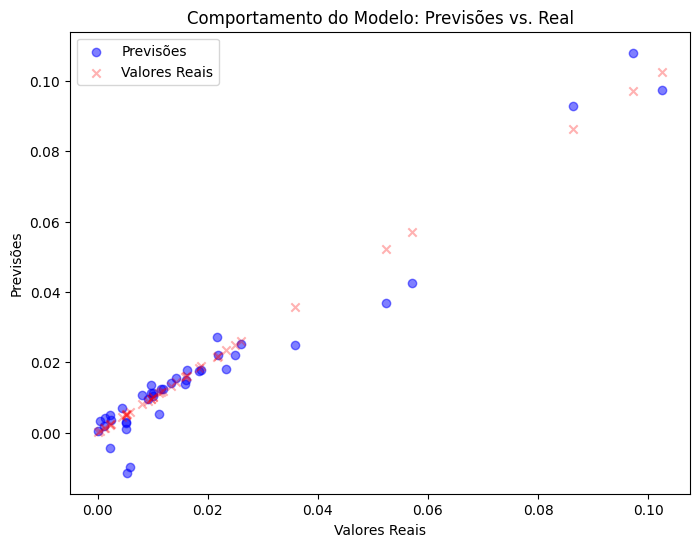

In [ ]:


#Coefieciente do modelo
coefficients = model.coef_

#comportamento do modelo (gráfico de dispersão)
plt.figure(figsize=(8, 6))

#gráfico de dispersão para os valores reais vs. as previsões
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Previsões")

#gráfico de dispersão para os valores reais
plt.scatter(y_test, y_test, color='red', alpha=0.3, label="Valores Reais", marker='x')

plt.title("Comportamento do Modelo: Previsões vs. Real")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.legend()
plt.show()
